# Analizando datos

Trabajaremos con un conjunto de datos extraido del sitio de [wine-information](https://www.kaggle.com/dev7halo/wine-information) y corresponde a un análisis sobre características del vino

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Información del conjunto de datos
1. id - ID (identificador) del vino
2. name - nombre del vino
3. producer - productor
4. nation - país de origen
5. local1 - region1
6. local2 - region2
7. local3 - region3
8. local4 - region4
9. ~ 20) varieties1 ~ varieties12 - variedades de vino
21. type - tipo de vino
22. use - uso del vino
23. abv - Alcohol por volumen
24. degree - temperatura de bebida
25. sweet - nivel de dulzura (entre 1 y 5)
26. acidity - nivel de acidez (entre 1 y 5)
27. body - nivel de cuerpo (entre 1 y 5)
28. tannin - nivel de tanino (entre 1 y 5)
29. price - precio del vino basado en dólares NO GANADOS!! (₩, WON)
30. year - año de producción
31. ml - volumen del vino (mililitros)



#### 1- Usando la librería ``pandas``

leer el archivo ``cleansingWine.csv`` y asignar el contenido a una variable que llamaremos ``datos``, luego visualizar los primeros registros ``datos.head()``

In [27]:
import pandas as pd
datos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LAB-GrupoA/datos/cleansingWine.csv')
datos.head()

<ipython-input-27-ff8640c82881>:2: DtypeWarning: Columns (8,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  datos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LAB-GrupoA/datos/cleansingWine.csv')


,Unnamed: 0,id,name,producer,nation,local1,local2,local3,local4,varieties1,...,use,abv,degree,sweet,acidity,body,tannin,price,year,ml
0,0,137197,Altair,Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,...,Table,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000,2014,750
1,1,137198,"Altair, Sideral",Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,...,Table,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000,2016,750
2,2,137199,Baron du Val Red,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,...,Table,11~12,15~17,SWEET2,ACIDITY3,BODY2,TANNIN2,0,0,750
3,3,137200,Baron du Val White,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,...,Table,11~12,9~11,SWEET1,ACIDITY3,BODY2,TANNIN1,0,0,750
4,4,137201,"Benziger, Cabernet Sauvignon",Benziger,USA,California,NaN,NaN,NaN,Cabernet Sauvignon,...,Table,13~14,17~19,SWEET1,ACIDITY3,BODY3,TANNIN4,0,2003,750


#### 2- Visualizar la dimensión del DataFrame ``datos``
Cuantas filas y cuantas columnas tiene el dataset?


In [53]:
filas, columnas = datos.shape
print(f"Número de filas: {filas}")
print(f"Número de columnas: {columnas}")

Número de filas: 21605
Número de columnas: 32


#### 3-  Crear un DataFrame con el nombre ``vinos_variedad1`` con los siguientes campos:

    'name',
    'producer',
    'nation',
    'varieties1',
    'sweet',
    'acidity',
    'body',
    'tannin'

In [29]:
vinos_variedad1 = datos[['name', 'producer', 'nation', 'varieties1', 'sweet', 'acidity', 'body', 'tannin']]
vinos_variedad1.head()

,name,producer,nation,varieties1,sweet,acidity,body,tannin
0,Altair,Altair,Chile,Cabernet Sauvignon,SWEET1,ACIDITY4,BODY5,TANNIN4
1,"Altair, Sideral",Altair,Chile,Cabernet Sauvignon,SWEET1,ACIDITY3,BODY4,TANNIN4
2,Baron du Val Red,Baron du Val,France,Carignan,SWEET2,ACIDITY3,BODY2,TANNIN2
3,Baron du Val White,Baron du Val,France,Carignan,SWEET1,ACIDITY3,BODY2,TANNIN1
4,"Benziger, Cabernet Sauvignon",Benziger,USA,Cabernet Sauvignon,SWEET1,ACIDITY3,BODY3,TANNIN4


#### 4- Renombrar los nombres de las siguientes columnas como sigue:
    name => nombre
    producer => productor
    nation => nacion
    varieties1 => variedad1
    sweet => dulzura
    acidity => acidez
    body => cuerpo
    tannin => tanino

In [30]:
vinos_variedad1 = vinos_variedad1.rename(columns={
    'name': 'nombre',
    'producer': 'productor',
    'nation': 'nacion',
    'varieties1': 'variedad1',
    'sweet': 'dulzura',
    'acidity': 'acidez',
    'body': 'cuerpo',
    'tannin': 'tanino'
})
vinos_variedad1.head()

,nombre,productor,nacion,variedad1,dulzura,acidez,cuerpo,tanino
0,Altair,Altair,Chile,Cabernet Sauvignon,SWEET1,ACIDITY4,BODY5,TANNIN4
1,"Altair, Sideral",Altair,Chile,Cabernet Sauvignon,SWEET1,ACIDITY3,BODY4,TANNIN4
2,Baron du Val Red,Baron du Val,France,Carignan,SWEET2,ACIDITY3,BODY2,TANNIN2
3,Baron du Val White,Baron du Val,France,Carignan,SWEET1,ACIDITY3,BODY2,TANNIN1
4,"Benziger, Cabernet Sauvignon",Benziger,USA,Cabernet Sauvignon,SWEET1,ACIDITY3,BODY3,TANNIN4


## Explorar los datos de vino por nación
Estamos analizando y explorando los datos por medio de medidas descriptivas y visualizaciones.

#### 5- Visualizar los valores de la columna ``nacion`` de manera única (sin repeticiones)

In [31]:
# Obtener y visualizar los valores únicos de la columna 'nacion'
vinos_variedad1['nacion'].unique()

array(['Chile', 'France', 'USA', 'Italy', 'Germany', 'Spain',
       'New Zealand', 'Australia', 'Argentina', 'Canada', 'Portugal',
       'the Republic of South Africa', 'Greece', 'Romania', 'Hungary',
       'Lebanon', 'Israel', 'Austria', 'Korea', 'Others', 'Bulgaria',
       'Japan', 'Georgia', 'UK', 'Uruguay', 'Slovenia', 'Azerbaijan',
       'China', 'Moldova', nan, 'Croatia', 'Sweden'], dtype=object)

#### 6- Guardar en la variable ``vinos_por_nacion``  la cantidad de vinos observados por nacion.

In [32]:
vinos_por_nacion = vinos_variedad1['nacion'].value_counts()

In [33]:
print(vinos_por_nacion)

nacion
France                          6949
Italy                           4331
USA                             2771
Chile                           2031
Spain                           1684
Australia                       1490
Argentina                        544
Germany                          415
the Republic of South Africa     321
New Zealand                      305
Portugal                         251
Austria                          132
Greece                            71
Canada                            51
Slovenia                          49
Korea                             42
Hungary                           28
Romania                           25
Moldova                           25
Croatia                           15
Georgia                           14
Bulgaria                          12
Japan                             10
UK                                 7
Uruguay                            7
Israel                             5
China                          

#### 7- Mostrar la media y la mediana de la cantidad de vinos por nacion

In [34]:
media_vinos = vinos_por_nacion.mean() # media
mediana_vinos = vinos_por_nacion.median() # mediana
print("Media:", media_vinos)
print("Mediana:", mediana_vinos)

Media: 696.8709677419355
Mediana: 42.0


#### 8- Visualizar la cantidad de vinos por nación en las diez naciones con mayores datos, usando los datos en ``vinos_por_nacion``
Referencia: [Chart Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

Usar gráfico de barras

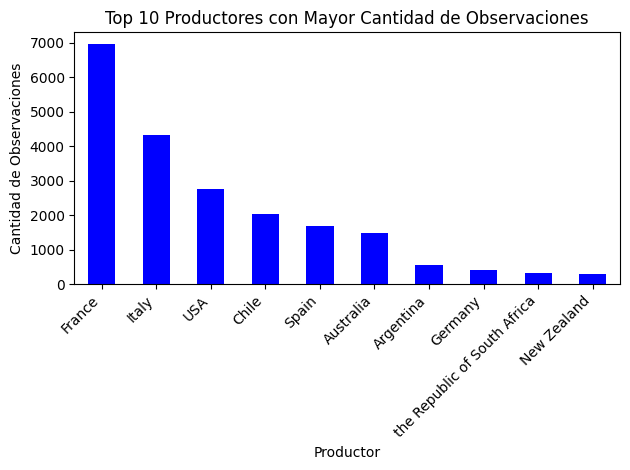

In [51]:
#vinos_por_nacion[0:10].plot.bar()
import matplotlib.pyplot as plt

top_10_productores = vinos_por_nacion.sort_values(ascending=False).head(10)
top_10_productores.plot(kind='bar', color='blue')

plt.title('Top 10 Productores con Mayor Cantidad de Observaciones')
plt.xlabel('Productor')
plt.ylabel('Cantidad de Observaciones')


plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 9- Mostrar información de resumen estadístico de los datos de ``vinos_por_nacion`` en forma numérica

In [36]:
vinos_por_nacion.describe()

,count
count,31.000000
mean,696.870968
std,1523.268016
min,3.000000
25%,8.500000
50%,42.000000
75%,368.000000
max,6949.000000


## Explorar los datos por productor


#### 10- Visualizar los valores de la columna ``productor`` de manera única (sin repeticiones)
¿Cuántos tipos de productores existen en el conjunto de datos?

In [37]:
valores_unicos_productor = vinos_variedad1['productor'].unique()
num_productores_unicos = len(valores_unicos_productor)

print(f'Valores únicos en la columna productor (sin repeticiones): {valores_unicos_productor}')
print(f'Número de tipos únicos de productores: {num_productores_unicos}')


Valores únicos en la columna productor (sin repeticiones): ['Altair' 'Baron du Val' 'Benziger' ... 'Les Cocottes' 'Vincent Ledy'
 'Laurent Ponsot']
Número de tipos únicos de productores: 4819


#### 11- Guardar en la variable ``cantidad_por_productor`` la cantidad de observaciones por productor que aparece en el conjunto de datos
¿Qué cantidad de datos tiene cada productor?

In [38]:
cantidad_por_productor = vinos_variedad1['productor'].value_counts()
print(cantidad_por_productor)


productor
Louis Jadot                               84
Concha y Toro                             75
Tesco Finest                              73
GCF  GCF Group                            70
Gallo Family Vineyard  EJ Gallo Winery    68
                                          ..
Canneta                                    1
Badia di Morrona                           1
Fattoria di Montemaggio                    1
Domaine Bosquet Des Papes                  1
Chateau La Tour De Mons                    1
Name: count, Length: 4819, dtype: int64


#### 12- Realice un gráfico de los 10 mayores productores

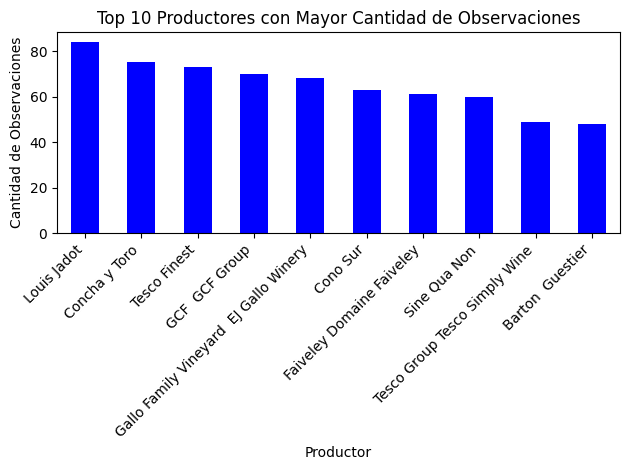

In [40]:
#cantidad_por_productor[0:10].plot.bar()
import matplotlib.pyplot as plt

top_10_productores = cantidad_por_productor.sort_values(ascending=False).head(10)
top_10_productores.plot(kind='bar', color='blue')

plt.title('Top 10 Productores con Mayor Cantidad de Observaciones')
plt.xlabel('Productor')
plt.ylabel('Cantidad de Observaciones')


plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### 13- Mostrar las variedades de vinos que existen en el conjunto de datos.

In [41]:
variedades_unicas = vinos_variedad1['variedad1'].unique()
print(variedades_unicas)

['Cabernet Sauvignon' 'Carignan' 'Gamay' 'Merlot' 'Sauvignon blanc'
 'Semillon' 'Lambrusco' 'Etc' nan 'Carmenere' 'Concord' 'Blend'
 'Chardonnay' 'Zinfandel' 'Pinot Noir' 'Grenache' 'Syrah & Shiraz'
 'Viognier' 'Clairette' 'Marsanne' 'Dornfelder' 'Riesling' 'Trebbiano'
 'Rivaner' 'Silvaner' 'Tempranillo' 'Viura' 'Moscato' 'Sangiovese'
 'Sangiovese Grosso' 'Procanico' 'Colorino' 'Pinot Grigio' 'Prosecco'
 'Malbec' 'Cabernet Franc' 'Mauzac' 'Nebbiolo' 'Barbera' 'Brachetto'
 'Bordeaux Blend Red' 'Montepulciano' 'Corvina' 'Garganega'
 'Corvina Veronese' 'Grenache Noir' 'Prugnolo Gentile' 'Vernaccia' 'Vidal'
 'Bual' 'Tinta Negra Mole' 'Orange Muscat' 'Muscat' 'Macabeo' 'Dolcetto'
 'Arneis' 'Chenin Blanc' 'Muscat Blanc Petits Grains' 'Touriga Nacional'
 'Aligote' 'Black Grenache' 'Grenache Blanc' 'Muscadet' 'Gewurztraminer'
 'mourvedre' 'Apple' 'Tinta de Toro' 'Tinta Francisca' 'Gouveio'
 'Garnacha' 'Carinena' 'Furmint' 'Bourboulenc' 'Lacrima'
 'Verdicchio Bianco' 'Marzemino' 'Tinta Roriz' '

#### 14- Muestre la cantidad de observaciones que existe por cada variedad

In [42]:
cantidad_por_variedad = vinos_variedad1['variedad1'].value_counts()
print(cantidad_por_variedad)

variedad1
Cabernet Sauvignon    2816
Chardonnay            2622
Pinot Noir            2619
Merlot                1679
Syrah & Shiraz        1379
                      ... 
Bovale Sardo             1
Gatarratto               1
Symphony                 1
Onion                    1
Franconia                1
Name: count, Length: 352, dtype: int64


#### 15- Grafique las 5 variedades con mas observaciones en el conjunto de datos


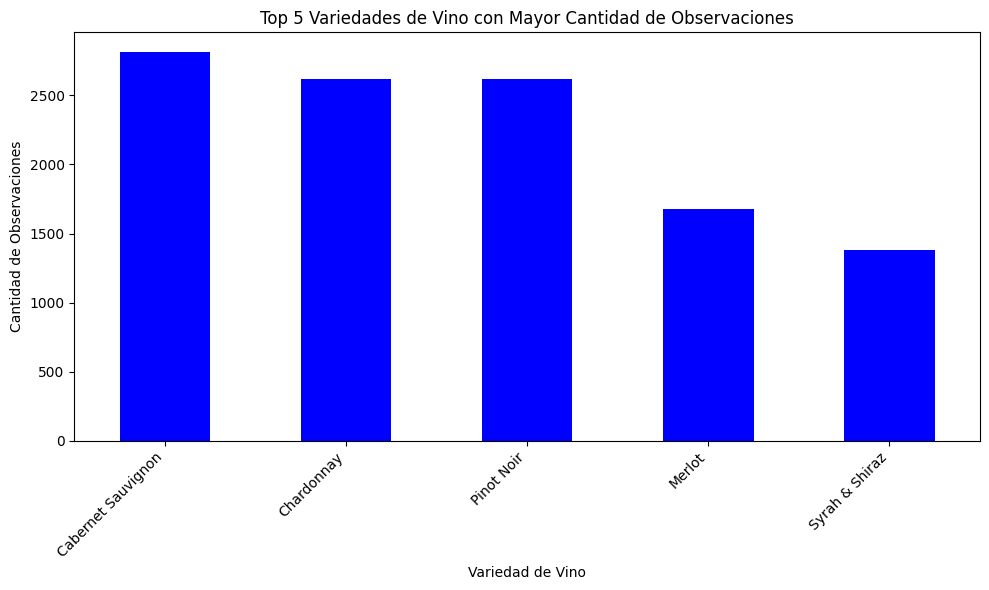

In [44]:
import matplotlib.pyplot as plt
cantidad_por_variedad = vinos_variedad1['variedad1'].value_counts()

top_5_variedades = cantidad_por_variedad.head(5)

plt.figure(figsize=(10, 6))
top_5_variedades.plot(kind='bar', color='blue')

plt.title('Top 5 Variedades de Vino con Mayor Cantidad de Observaciones')
plt.xlabel('Variedad de Vino')
plt.ylabel('Cantidad de Observaciones')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### 16- Seleccione los datos correspondiente al vino de la variedad Merlot

In [45]:
vinos_merlot = vinos_variedad1[vinos_variedad1['variedad1'] == 'Merlot']
vinos_merlot.head()


,nombre,productor,nacion,variedad1,dulzura,acidez,cuerpo,tanino
6,"Calvet, Aetos",Calvet,France,Merlot,SWEET1,ACIDITY3,BODY4,TANNIN3
7,"Calvet, Bordeaux Red",Calvet,France,Merlot,SWEET1,ACIDITY3,BODY2,TANNIN3
10,"Calvet, Varietals Merlot",Calvet,France,Merlot,SWEET1,ACIDITY3,BODY3,TANNIN3
15,"Calvet, Saint Emilion",Calvet,France,Merlot,SWEET1,ACIDITY3,BODY2,TANNIN2
18,La Carillon de l'Angelus,Chateau Angelus 1st Grand Cru ClasseA,France,Merlot,SWEET1,ACIDITY3,BODY4,TANNIN4


#### 17- Guardar los datos de vinos de la variedad Merlot en un archivo, que llamaremos ``vinosMerlot.csv``, en formato csv y sin el índice.

In [54]:
vinos_merlot.to_csv('vinosMerlot.csv', index=False)

## ¿Que otras preguntas podría responder en la exploración de este conjunto de datos? Plantee por lo menos 3 preguntas.

1. ¿Cuál es la distribución de los niveles de dulzura entre las diferentes variedades de vino?
2. ¿Cuál es la relación entre la acidez y el cuerpo de los vinos de diferentes productores?
3. ¿Cómo se distribuyen las calificaciones de vinos en función del país de origen?


